In [99]:
def pois_pos_degrees(D, N):
  import numpy as np
  np.random.seed(0)

  'Draw N degrees from a Poissonian sequence with lambda = D and length L'
  def remove_zeros(array):
    print("array", array, "degarray", np.sum(array))
    its = 0
    while True:
      its += 1
      mask = np.where(array == 0)
      if not mask[0].size: 
        print(f"Replacing non-0 degrees in {its} iterations")
        return array
      
      'the sum of the degrees must be even'
      psum = np.sum(array)
      print("psum", psum)
      if not psum % 2: #psum is even return even cover
        while True:
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          print("even cover?", cover)
          if not np.sum(cover) % 2: break
      else:
        while True: #psum is odd return odd cover
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          if np.sum(cover) % 2: break
      print("cover final", cover)
      array[mask] = cover

  pos_degrees = np.random.poisson(lam = D, size = N)
  pos_degrees = remove_zeros(pos_degrees)
  print(pos_degrees)
  return pos_degrees

D, N = 2, 5
degrees = pois_pos_degrees(D, N)

print('N',N)


array [3 2 5 1 0] degarray 11
psum 11
cover final [7]
Replacing non-0 degrees in 4 iterations
[3 2 5 1 7]
N 5


In [100]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np


np.random.seed(1)
print("degrees", degrees, sum(degrees))

#G = nx.configuration_model(degrees, seed = seed)

#print("degrees" , G.degree, G.edges())
nodes = np.arange(N)
dic_nodes = nodes.copy()
np.random.shuffle(dic_nodes)
dic_nodes = {k:v for k in dic_nodes for v in np.sort(degrees)[np.where(dic_nodes == k)]}
sorted_nodes = np.array([x for x in dic_nodes.keys()])

print(f'nodes: {nodes}, sorted_nodes: {sorted_nodes}', "dic_nodes", dic_nodes, np.sort(degrees))

from copy import deepcopy
'This is a part only to check the final graph'
check_nodes = [[],[],[]]
check_ls = [list(nodes), list(sorted_nodes), dic_nodes]
i = 0
for x in check_ls:
    check_nodes[i] = deepcopy(x)
    i += 1
#check_nodes[2] = deepcopy()
print(f'check_nodes: {check_nodes}')

degrees [3 2 5 1 7] 18
nodes: [0 1 2 3 4], sorted_nodes: [2 1 4 0 3] dic_nodes {2: 1, 1: 2, 4: 3, 0: 5, 3: 7} [1 2 3 5 7]
check_nodes: [[0, 1, 2, 3, 4], [2, 1, 4, 0, 3], {2: 1, 1: 2, 4: 3, 0: 5, 3: 7}]


In [104]:
def delete_node_from_both(avl_node, nodes, sorted_nodes, b_bool):
    nodes = np.delete(nodes, np.where(nodes == avl_node))
    sorted_nodes = np.delete(sorted_nodes, np.where(sorted_nodes == avl_node))
    print(f'len(nodes): {len(nodes)}',)
    if len(nodes) == 1: 
        print(f'\nEnd By len(nodes):{len(nodes)},{len(sorted_nodes)}')
        b_bool = True
    return nodes, sorted_nodes, b_bool

def add_edge(snode, i, b_bool, edges, sorted_nodes, nodes,):
    D = len(nodes)
    snode_idx = np.where(nodes == snode)[0]
    avl_node = nodes[(snode_idx+i)%D] #nearest available node
    print(f'Inside i={i} with D = {D} add_edge: nodes: {nodes}, snode_idx[{snode}]:{snode_idx},' )   
    print(f"Before edge.add: selected node: {avl_node}, deg[{avl_node}]: {dic_nodes[int(avl_node)]}")
    edges.add((int(snode),int(avl_node)))
    dic_nodes[int(avl_node)] -= 1
    print(f'after edge.add: edges, dic_nodes[{avl_node}]', edges, dic_nodes[int(avl_node)])
    if dic_nodes[int(avl_node)]==1:
        nodes, sorted_nodes, b_bool = delete_node_from_both(avl_node,  nodes, sorted_nodes, b_bool)
        print(f'Deleted {avl_node}: nodes, sorted_nodes', nodes, sorted_nodes)
       

def edges_nearest_node(dic_nodes):
    from copy import deepcopy
    sorted_nodes = np.array([x for x in deepcopy(dic_nodes).keys()])
    nodes = np.arange(len(sorted_nodes))
    print(f'nodes: {nodes}',f'sorted_nodes: {sorted_nodes}',
    )
    
    print(f'id(nodes): {id(nodes)}',f"id(dic_nodes.keys)", id(dic_nodes.keys()), np.array(dic_nodes.keys()))
    edges = set()
    b_bool = False #breakingbool
    for snode in sorted_nodes:
        print(f'\nRecap nodes: nodes: {nodes}, sorted_nodes & degree', sorted_nodes, [dic_nodes[k] for k in sorted_nodes])
        print(f'Choosen snode: {snode} with degree: {dic_nodes[snode]}')
        snode_idx = np.where(nodes == snode)[0]
        for i in np.arange(1, dic_nodes[snode]//2+1):
            no_avl_nodes = [a for (a,b) in edges if b == snode]
            print(f'check already takes edges & avl_nodes: {edges}, {no_avl_nodes}', )
            #if nodes[(snode_idx+i)%D] not in no_avl_nodes:
            add_edge(snode, i, b_bool, edges = edges, sorted_nodes = sorted_nodes, nodes = nodes,)
            if b_bool: 
                print(f'i bbool break: ',)
                break
            add_edge(snode, -i, b_bool, edges = edges, sorted_nodes = sorted_nodes, nodes = nodes)
            if b_bool: 
                print(f'-i bbool break: ',)
                break

        if dic_nodes[snode]%2: #and nodes[(snode_idx+1)%D] not in [b for (a,b) in edges if a == snode]:
            print("Odd last attachment")
            add_edge(snode = snode, i = 1, b_bool = b_bool, edges = edges, sorted_nodes = sorted_nodes, nodes = nodes)
            if b_bool: 
                print(f'Odd last bbool break: ',)
                break
        nodes, sorted_nodes, b_bool = delete_node_from_both(snode, nodes = nodes, sorted_nodes = sorted_nodes, b_bool = b_bool)
        print(f'End of 1 cycle deleted snode: {snode}')
        
        if b_bool: 
            print(f'End of all',)
            break
        print('After all the rewiring, left nodes', nodes, "sorted_nodes", sorted_nodes, "edges", edges)
    return edges

edges_nearest_node(dic_nodes)

def NN_pois_net(N, D, folder = "bleah", p = 0, conn_flag = True):
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    G.add_edges_from(edges)

    check_loops_parallel_edges(G)
    infos_sorted_nodes(G, num_sorted_nodes=False)

    long_range_edge_add(G, p = p)
    connect_net(G, conn_flag = conn_flag)

    print(f"There are {len([j for i,j in G.degree() if j == 0])} 0 degree node as")
    _,D,_ = N_D_std_D(G)
    print(f"End of wiring with average degree {D} vs {ext_D}")

    return G






nodes: [2 1 4 0 3] sorted_nodes: [2 1 4 0 3]
id(nodes): 140539070959664 id(dic_nodes.keys) 140539111386368 dict_keys([2, 1, 4, 0, 3])

Recap nodes: nodes: [2 1 4 0 3], sorted_nodes & degree [2 1 4 0 3] [1, 2, 3, 5, 7]
Choosen snode: 2 with degree: 1
Odd last attachment
Inside i=1 with D = 5 add_edge: nodes: [2 1 4 0 3], snode_idx[2]:[0],
Before edge.add: selected node: [1], deg[[1]]: 2
after edge.add: edges, dic_nodes[[1]] {(2, 1)} 1
len(nodes): 4
Deleted [1]: nodes, sorted_nodes [2 4 0 3] [2 4 0 3]
len(nodes): 4
End of 1 cycle deleted snode: 2
After all the rewiring, left nodes [1 4 0 3] sorted_nodes [1 4 0 3] edges {(2, 1)}

Recap nodes: nodes: [1 4 0 3], sorted_nodes & degree [1 4 0 3] [1, 3, 5, 7]
Choosen snode: 1 with degree: 1
Odd last attachment
Inside i=1 with D = 4 add_edge: nodes: [1 4 0 3], snode_idx[1]:[0],
Before edge.add: selected node: [4], deg[[4]]: 3
after edge.add: edges, dic_nodes[[4]] {(2, 1), (1, 4)} 2
len(nodes): 3
End of 1 cycle deleted snode: 1
After all the rew

check_nodes: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 9, 6, 4, 0, 3, 1, 7, 8, 5], {2: 1, 9: 1, 6: 2, 4: 2, 0: 3, 3: 3, 1: 3, 7: 5, 8: 5, 5: 7}]
edges: {(0, 1), (9, 0), (6, 5), (4, 3), (1, 5), (7, 5), (1, 8), (2, 3), (6, 7), (4, 5), (7, 8), (0, 8), (8, 5), (3, 5)}


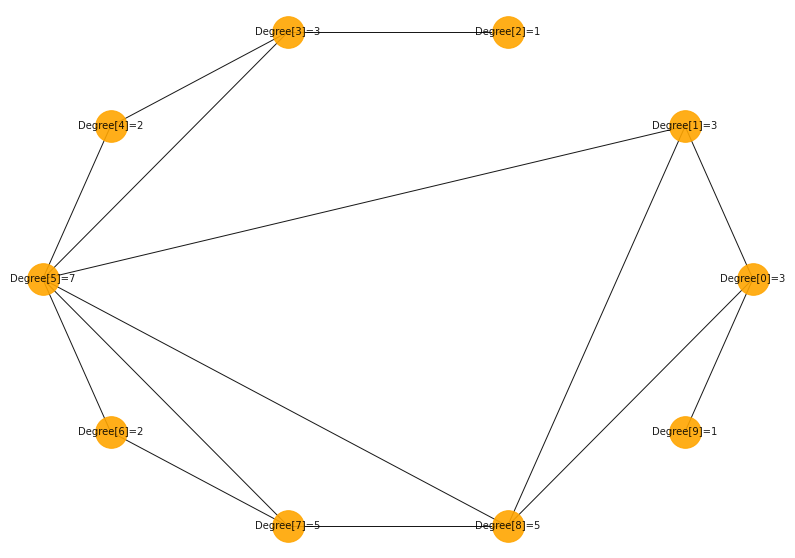

In [86]:
print(f'check_nodes: {check_nodes}',)

G = nx.Graph()
G.add_nodes_from(np.arange(N))
G.add_edges_from(edges)

fig, ax = plt.subplots(figsize = (14,10))
labels = {k:f"Degree[{k}]={v}" for k,v in check_nodes[2].items()}

#labels = nx.draw_networkx_labels(G,pos=nx.draw_circular(G), font_size = 40)
#pos = nx.nx_pydot.graphviz_layout(G, prog = "neato" )
nx.draw_circular(G, ax = ax, with_labels = True, labels = labels, width = 1, node_size = 1e3, alpha = 0.9, node_color = "orange", font_size = 10)
#plt.subplots_adjust(left = 0, right = 1.2)
plt.show()

In [5]:
ls = [(1,2),(3,4)]

remnant = [j for (i,j) in ls if i == 1]
print(f'remnant: {remnant}',)

def return_f(x,y):
    print(f'x*y: {x*y}',)
    if x*y > 4:
        return

for x in [1,2,3]:
    for y in [2,3,4]:
        break_f(x,y)

    print(f'x: {x}',)
    if x == 2:
        print(f'break',)
        break
        

remnant: [2]


NameError: name 'break_f' is not defined

In [ ]:
def remove_loops_parallel_edges(remove_loops = True):
  print("\n")
  import networkx as nx

  G = nx.complete_graph(10)

  'create a list of what we want to remove'
  full_ls = list(G.edges())
  print(f'full_ls: {full_ls}')
  
  lpe = []
  for i in full_ls:
    full_ls.remove(i)
    #print(f'full_ls: {full_ls}')
    
    for j in full_ls:
      if i == j: lpe.append(j) #print("i", i, "index", full_ls.index(i), "j", j)
  return lpe

remove_loops_parallel_edges()




full_ls: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


[]